<a href="https://colab.research.google.com/github/Lucky456F/Tamizan-Skills-Internship-ML-AI-PROJECT-3/blob/main/Project_3_Loan_Eligibility_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

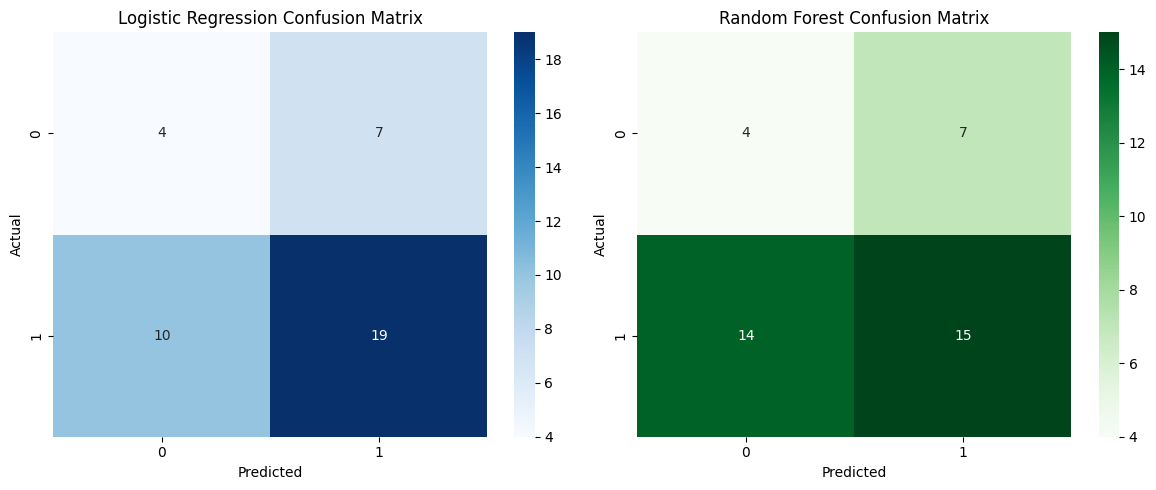

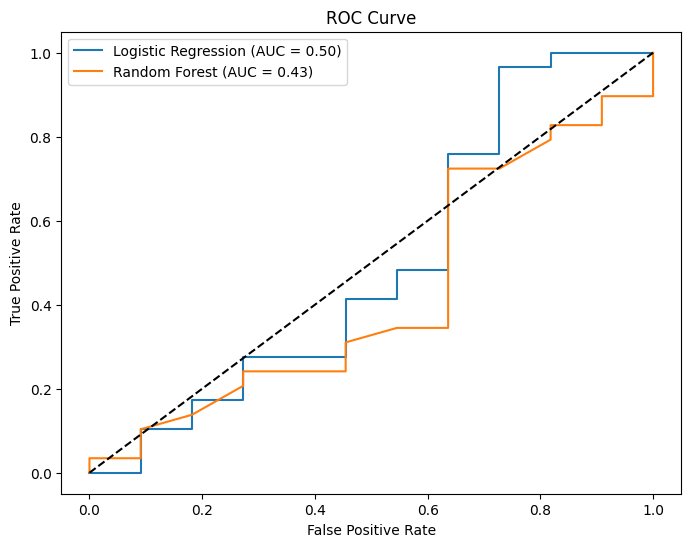

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.29      0.36      0.32        11
           1       0.73      0.66      0.69        29

    accuracy                           0.57        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.61      0.57      0.59        40

Random Forest Report:
               precision    recall  f1-score   support

           0       0.22      0.36      0.28        11
           1       0.68      0.52      0.59        29

    accuracy                           0.47        40
   macro avg       0.45      0.44      0.43        40
weighted avg       0.56      0.47      0.50        40



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load your dataset
# df = pd.read_csv('loan_data.csv')
# For demonstration, let's create a mock dataset
np.random.seed(0)
df = pd.DataFrame({
    'age': np.random.randint(20, 60, 200),
    'income': np.random.randint(20000, 100000, 200),
    'education': np.random.choice(['Graduate', 'Not Graduate'], 200),
    'credit_score': np.random.choice([600, 700, 800, np.nan], 200),
    'gender': np.random.choice(['Male', 'Female'], 200),
    'loan_approved': np.random.choice([0, 1], 200)
})

# Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['credit_score'] = imputer.fit_transform(df[['credit_score']])

# Encode categorical variables
label_encoders = {}
for col in ['education', 'gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('loan_approved', axis=1)
y = df['loan_approved']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
logreg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict probabilities
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation: Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_logreg, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Evaluation: ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification reports
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
